<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/REDNEURONALMODULACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta al archivo
path = '/content/drive/My Drive/TDS/RML2016.10a_dict.dat'

# Cargar la base de datos
with open(path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Verificar el tipo de datos cargados
print(f"Tipo de datos: {type(data)}")
print(f"Claves del diccionario: {list(data.keys())[:5]}")  # Mostrar solo las primeras 5 claves para evitar mucha salida

# Verificar el formato de las señales
for key in list(data.keys())[:2]:  # Mostrar solo los primeros 2 ejemplos
    print(f"Clave: {key}")
    for signal in data[key][:2]:  # Mostrar las primeras 2 señales por clave
        print(f"Formato de la señal: {signal.shape}")
        print(f"Datos de la señal: {signal[:5]}")  # Mostrar los primeros 5 datos de la señal



Mounted at /content/drive
Tipo de datos: <class 'dict'>
Claves del diccionario: [('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8)]
Clave: ('QPSK', 2)
Formato de la señal: (2, 128)
Datos de la señal: [[-1.0265000e-03  5.8502653e-03 -9.3906338e-04 -2.2335863e-03
  -1.3568916e-04 -6.8309228e-04  4.1412762e-03  1.2770405e-03
  -3.4695407e-03 -6.4070662e-04  1.9288055e-03 -3.1959298e-03
   1.9657889e-03  2.2193526e-03  2.2501240e-03  1.0834818e-03
  -3.2876425e-03  3.2260290e-03  1.8539119e-03  1.4974185e-03
  -4.7951085e-03 -5.2285631e-04  1.1597933e-04  5.3670054e-04
  -1.6577138e-03  3.5826277e-03 -2.8328735e-03  1.7530784e-03
  -2.4740885e-03 -1.5094796e-03  9.3733874e-04 -1.8275570e-03
  -2.8713259e-03 -1.5362875e-03 -3.7586095e-04  8.5423136e-04
  -1.8415806e-03 -2.6825715e-03 -1.2375436e-03 -3.1134628e-03
   4.5682848e-03 -1.5236636e-03  7.2360924e-03 -1.0099898e-03
  -3.1587915e-04 -5.8839722e-03  2.0147045e-03 -3.5786787e-03
   1.0269805e-03  7.5495308e-03  3.125

In [2]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Función para generar espectrograma
def generate_spectrogram(signal, sr=1000, n_fft=256, hop_length=128):
    D = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    return DB

# Inicializar listas para almacenar los espectrogramas y etiquetas
spectrograms = []
labels = []

# Definir un diccionario para mapear tipos de modulación a etiquetas numéricas
modulation_dict = {'QPSK': 0, 'QAM16': 1, 'QAM64': 2}

# Recorrer las claves del diccionario y generar espectrogramas
for key, signals in data.items():
    modulation, snr = key
    if modulation in modulation_dict:
        for signal in signals:
            # Convertir la señal a formato complejo
            complex_signal = signal[0::2] + 1j * signal[1::2]
            # Generar espectrograma
            spectrogram = generate_spectrogram(complex_signal.real)
            # Asegurar que todos los espectrogramas tengan la misma dimensión
            if spectrogram.shape != (128, 128):  # Ajustar según el tamaño deseado
                spectrogram = librosa.util.fix_length(spectrogram, size=128, axis=1)[:128, :]
            # Almacenar el espectrograma y la etiqueta
            spectrograms.append(spectrogram)
            labels.append(modulation_dict[modulation])

# Convertir listas a arrays numpy
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Verificar las dimensiones
print(f"Dimensiones de los espectrogramas: {spectrograms.shape}")
print(f"Dimensiones de las etiquetas: {labels.shape}")




/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=128
  warnings.warn(


Dimensiones de los espectrogramas: (60000, 1, 128, 2)
Dimensiones de las etiquetas: (60000,)


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)

# Expandir dimensiones para que sean compatibles con la entrada de la CNN (número de muestras, altura, anchura, canales)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (48000, 1, 128, 2, 1)
Dimensiones de X_test: (12000, 1, 128, 2, 1)
Dimensiones de y_train: (48000, 3)
Dimensiones de y_test: (12000, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (1, 3), activation='relu', input_shape=(1, 128, 2)),
    MaxPooling2D((1, 2)),
    Dropout(0.25),
    Conv2D(64, (1, 3), activation='relu'),
    MaxPooling2D((1, 2)),
    Dropout(0.25),
    Conv2D(128, (1, 3), activation='relu'),  # Añadir más capas
    MaxPooling2D((1, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.2f}")




Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3360 - loss: 1.2281 - val_accuracy: 0.3302 - val_loss: 1.0986
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3347 - loss: 1.0988 - val_accuracy: 0.3302 - val_loss: 1.0987
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3343 - loss: 1.0988 - val_accuracy: 0.3302 - val_loss: 1.0986
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3345 - loss: 1.0987 - val_accuracy: 0.3358 - val_loss: 1.0986
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3310 - loss: 1.0987 - val_accuracy: 0.3341 - val_loss: 1.0986
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3353 - loss: 1.0988 - val_accuracy: 0.3341 - val_loss: 1.0986
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3331 - loss: 1.0996 - val_accuracy: 0.3302 - val_loss: 1.0987
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3341 - loss: 1.0987 -

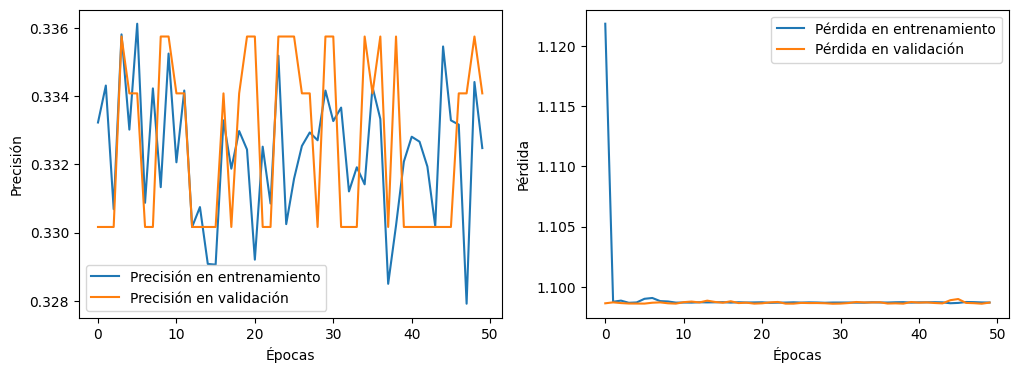

In [7]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
